In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import pandas as pd
import numpy as np  
import sys

## Spatial Gradient-based Analysis

To experiment with spatial effects (alone), we used a Dirichlet (constant value) boundary condition with substrate decay to induce a static gradient (after a short transient as substrate diffuses into the computational domain). Approximately half the domain is above the intervention activation threshold when the gradient is at steady-state.

Overall, we find that different interventions both take differing amounts of simulated time to take effect (to see the population begin to decline) and produce different steady state populations. This differs from the single-cell Boolean network context, in which the interventions give rise to identical long-term behaviors. 

### Load and process live cell data

This model includes only one population - so we extracted the live cells from each simulation time output. This data was placed in a CSV file. 

Here we load this into a dataframe. These are single simulations (no replicates) so we do not average here. 

In [3]:
df_raw = pd.read_csv('../dataframes/aggregated_live_cells_spatial_model.csv', index_col=0)
print(df_raw.shape)
df_raw.head()

(28, 361)


,0.0,12.0,24.0,36.0,48.0,60.0,72.0,84.0,96.0,108.0,...,4212.0,4224.0,4236.0,4248.0,4260.0,4272.0,4284.0,4296.0,4308.0,4320.0
intervention,,,,,,,,,,,,,,,,,,,,,
EG_Ceramide_S1P_1_11,1344,1343,1345,1348,1350,1351,1352,1354,1355,1357,...,817,817,818,818,819,820,818,818,819,818
EG_GAP_RAS_1_11,1344,1345,1346,1347,1348,1350,1351,1353,1354,1355,...,836,836,836,837,837,837,837,837,837,838
EG_IL15_GAP_0_11,1344,1345,1345,1346,1347,1348,1350,1351,1352,1352,...,834,834,834,834,835,835,835,836,836,835
EG_IL2RBT_IL2RB_0_11,1344,1344,1347,1348,1349,1352,1353,1353,1355,1355,...,809,809,810,810,811,811,812,812,813,813
EG_IL2RB_MCL1_0_11,1344,1344,1344,1348,1348,1348,1351,1352,1352,1350,...,818,818,818,821,822,822,822,821,821,820


We will mainly be using the transpose of `raw` so lets transpose it. 

In [4]:
df = df_raw.transpose()
df.head(100)

intervention,EG_Ceramide_S1P_1_11,EG_GAP_RAS_1_11,EG_IL15_GAP_0_11,EG_IL2RBT_IL2RB_0_11,EG_IL2RB_MCL1_0_11,EG_JAK_STAT3_0_11,EG_MCL1_BID_0_11,EG_PDGFR_SPHK1_0_11,EG_PI3K_ERK_0_11,EG_RAS_MEK_0_11,...,SM_anti_PDGFR_11,SM_anti_S1P_11,SM_anti_SPHK1_11,SM_pro_Ceramidepro_GRB2_11,SM_pro_Ceramidepro_IL2RBT_11,SM_pro_Ceramidepro_IL2RB_11,SM_pro_Ceramidepro_PI3Kpro_ERK_11,SM_pro_Ceramidepro_PI3Kpro_MEK_11,SM_pro_Ceramidepro_RAS_11,SM_pro_TBETpro_Ceramidepro_ERK_11
0.0,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344,...,1344,1344,1344,1344,1344,1344,1344,1344,1344,1344
12.0,1343,1345,1345,1344,1344,1347,1345,1343,1346,1345,...,1346,1344,1344,1345,1344,1348,1345,1343,1342,1344
24.0,1345,1346,1345,1347,1344,1348,1347,1344,1348,1345,...,1347,1344,1344,1349,1346,1348,1351,1344,1344,1345
36.0,1348,1347,1346,1348,1348,1351,1347,1345,1349,1347,...,1347,1345,1346,1352,1346,1349,1351,1343,1345,1345
48.0,1350,1348,1347,1349,1348,1352,1347,1346,1350,1348,...,1348,1346,1348,1356,1346,1349,1351,1343,1346,1345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140.0,746,789,806,749,747,736,735,753,757,756,...,766,760,749,733,731,742,743,753,743,726
1152.0,745,785,804,750,748,737,735,753,757,753,...,763,762,750,733,732,743,746,754,744,727
1164.0,744,783,797,748,748,737,735,753,757,753,...,762,762,748,734,732,744,746,754,744,727
1176.0,744,777,791,748,749,736,735,752,754,751,...,765,759,748,734,732,744,746,755,744,728


Now we have something to plot! Lets chck them out!!

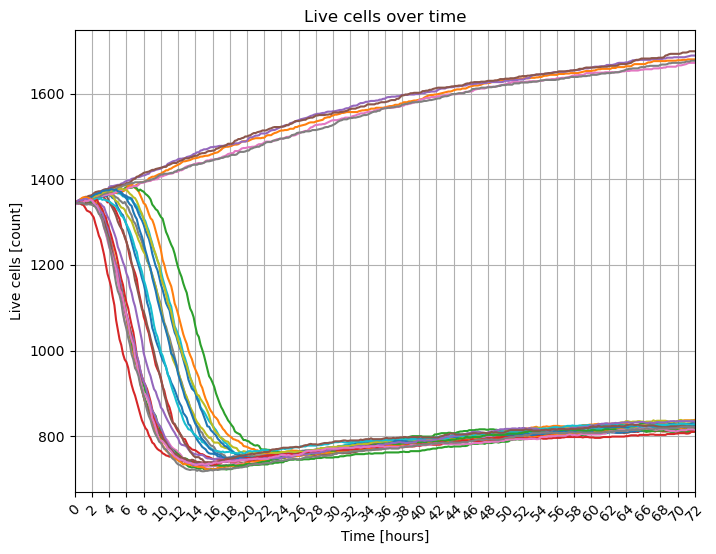

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

for intervention in df:
    plt.plot(df.index, df[intervention])

plt.title('Live cells over time')
plt.xlabel('Time [hours]')
plt.ylabel('Live cells [count]')
# plt.ylim(0, 3200)
plt.xlim(0, df.index[-1])
ticks = np.arange(0, len(df.index), 10)
plt.xticks(ticks, rotation=45)
plt.grid(axis='both', which='both')
# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x / 5  # 1/5 of an hour OR 12 minutes per index
    return f'{x:.0f}'

ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))
plt.show()

We see that there is both a variety of times at which population death outstrips proliferation as well as the steady state population at the final time point. 

Also, we can see that several interventions fail to control the growth of the population. Given the MaBoSS and Pulsed Interventions Analysis, we suspect these are the IBMFA interventiosn that simply fail to move the survival attractor to an apoptotic attractor. 

### Analysis - time to population decline

Lets find out how long each intervention takes to gain control of teh population. This is a proxy for how long it takes for an individual cell to become apoptotic. 



### First - find the max values and times at max

In [41]:
# find the max value of each column and the time it occurs
# place them in a dataframe

df_max_values = pd.DataFrame()

for column in df:
    max_value = df[column].max()
    max_value_index = df[column].idxmax()
    df_max_values[column] = [max_value, max_value_index]

df_max_values = df_max_values.transpose()

df_max_values.columns = ['max_value', 'time_at_max']

for column in df_max_values:
    df_max_values[column] = pd.to_numeric(df_max_values[column])

df_max_values.dtypes

max_value        int64
time_at_max    float64
dtype: object

### Find the final values (we will cut out or otherwise deal with the ones that faile)

In [42]:
# get the final values of each column - and turn this into a dataframe with the index as the original column names

df_final_values = pd.DataFrame()

for column in df:
    final_value = df[column].iloc[-1]
    df_final_values[column] = [final_value]

df_final_values = df_final_values.transpose()

df_final_values.columns = ['final_value']

df_final_values

,final_value
EG_Ceramide_S1P_1_11,818
EG_GAP_RAS_1_11,838
EG_IL15_GAP_0_11,835
EG_IL2RBT_IL2RB_0_11,813
EG_IL2RB_MCL1_0_11,820
EG_JAK_STAT3_0_11,816
EG_MCL1_BID_0_11,819
EG_PDGFR_SPHK1_0_11,829
EG_PI3K_ERK_0_11,829
EG_RAS_MEK_0_11,825


In [43]:
# Lets see if there is a correlation between the final value and the max value of each intervention

df_correlation = pd.concat([df_max_values, df_final_values], axis=1)

df_correlation

,max_value,time_at_max,final_value
EG_Ceramide_S1P_1_11,1365,180.0,818
EG_GAP_RAS_1_11,1388,396.0,838
EG_IL15_GAP_0_11,1382,408.0,835
EG_IL2RBT_IL2RB_0_11,1362,156.0,813
EG_IL2RB_MCL1_0_11,1352,84.0,820
EG_JAK_STAT3_0_11,1368,168.0,816
EG_MCL1_BID_0_11,1352,72.0,819
EG_PDGFR_SPHK1_0_11,1364,228.0,829
EG_PI3K_ERK_0_11,1366,204.0,829
EG_RAS_MEK_0_11,1370,276.0,825


In [44]:
# sort by time at max value

df_correlation.sort_values(by='time_at_max')

,max_value,time_at_max,final_value
SM_pro_Ceramidepro_PI3Kpro_MEK_11,1344,0.0,821
SM_pro_TBETpro_Ceramidepro_ERK_11,1345,24.0,822
IB_pro_DISC_11,1345,36.0,817
SM_pro_Ceramidepro_GRB2_11,1358,60.0,820
EG_MCL1_BID_0_11,1352,72.0,819
SM_pro_Ceramidepro_PI3Kpro_ERK_11,1354,72.0,834
EG_IL2RB_MCL1_0_11,1352,84.0,820
SM_pro_Ceramidepro_IL2RBT_11,1348,84.0,818
IB_pro_Ceramide_11,1352,84.0,810
SM_pro_Ceramidepro_IL2RB_11,1353,108.0,811


In [45]:
df_correlation.sort_values(by='final_value')

,max_value,time_at_max,final_value
IB_pro_Ceramide_11,1352,84.0,810
SM_pro_Ceramidepro_IL2RB_11,1353,108.0,811
EG_IL2RBT_IL2RB_0_11,1362,156.0,813
SM_pro_Ceramidepro_RAS_11,1353,108.0,815
EG_JAK_STAT3_0_11,1368,168.0,816
IB_pro_DISC_11,1345,36.0,817
SM_pro_Ceramidepro_IL2RBT_11,1348,84.0,818
EG_Ceramide_S1P_1_11,1365,180.0,818
EG_MCL1_BID_0_11,1352,72.0,819
SM_pro_Ceramidepro_GRB2_11,1358,60.0,820


In [46]:
df_correlation.dtypes

max_value        int64
time_at_max    float64
final_value      int64
dtype: object

In [50]:
# remove the interventions that are not relevant

df_clean = df_correlation[df_correlation['time_at_max'] < 1440]
df_clean

,max_value,time_at_max,final_value
EG_Ceramide_S1P_1_11,1365,180.0,818
EG_GAP_RAS_1_11,1388,396.0,838
EG_IL15_GAP_0_11,1382,408.0,835
EG_IL2RBT_IL2RB_0_11,1362,156.0,813
EG_IL2RB_MCL1_0_11,1352,84.0,820
EG_JAK_STAT3_0_11,1368,168.0,816
EG_MCL1_BID_0_11,1352,72.0,819
EG_PDGFR_SPHK1_0_11,1364,228.0,829
EG_PI3K_ERK_0_11,1366,204.0,829
EG_RAS_MEK_0_11,1370,276.0,825


/var/folders/0_/m923p2192vq__vjqjmt8w8gw0000gn/T/ipykernel_93513/1249529151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('max_value', axis=1, inplace=True)


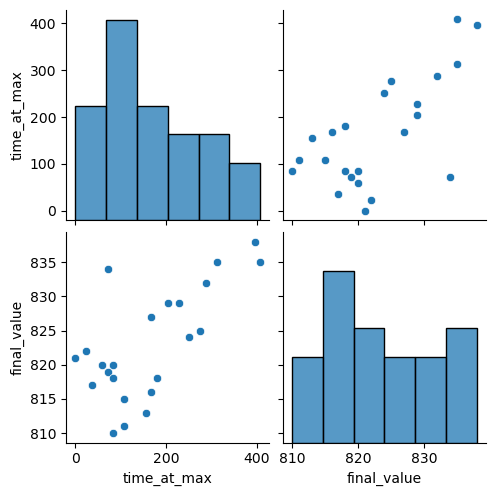

In [52]:
df_clean.drop('max_value', axis=1, inplace=True)
sns.pairplot(df_clean)

<AxesSubplot:xlabel='time_at_max', ylabel='final_value'>

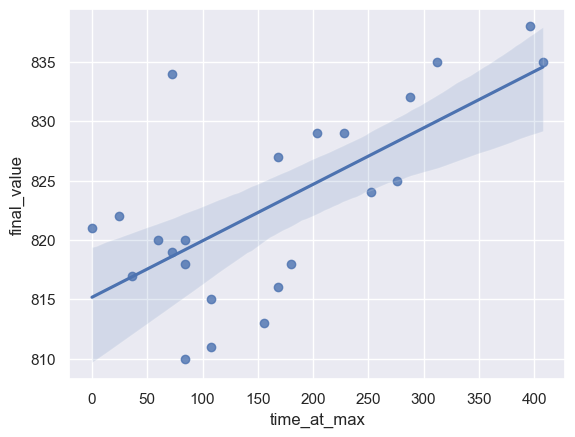

In [55]:
# set the sns style

sns.set_theme()

sns.regplot(data=df_clean, x='time_at_max', y='final_value')

### Correlation: Spearman

That line is nice - but lets do a statistic on the correlations. In this case, we want to look at the rankings and won't assume the relationship is linear - so we will do Spearman's correlations. 

from scipy import stats


In [63]:
import scipy
from scipy import stats

# data=df_clean, x='time_at_max', y='final_value'

res = stats.spearmanr(df_clean['time_at_max'], df_clean['final_value'])

res.correlation

1.9.3


0.5340600929678128

NameError: name 't_vals' is not defined

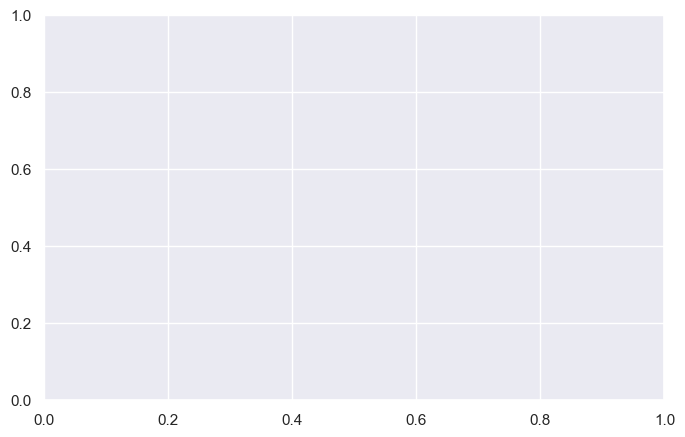

In [67]:
# SciPy documentation says to makethe null distribution (sounds like a bootstrap) and then calculate the p-value

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html


x = df_clean['time_at_max']
y = df_clean['final_value']


dof = len(x)-2  # len(x) == len(y)
dist = stats.t(df=dof)
t_vals = np.linspace(-5, 5, 100)
pdf = dist.pdf(t_vals)
fig, ax = plt.subplots(figsize=(8, 5))
def plot(ax):  # we'll reuse this
    ax.plot(t_vals, pdf)
    ax.set_title("Spearman's Rho Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")


def statistic(x):  # explore all possible pairings by permuting `x`
    rs = stats.spearmanr(x, y).correlation  # ignore pvalue
    transformed = rs * np.sqrt(dof / ((rs+1.0)*(1.0-rs)))
    return transformed


ref = stats.permutation_test((x,), statistic, alternative='greater',
                             permutation_type='pairings')
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
ax.hist(ref.null_distribution, np.linspace(-5, 5, 26),
        density=True)
ax.legend(['aymptotic approximation\n(many observations)',
           f'exact \n({len(ref.null_distribution)} permutations)'])
plt.show()